# Projeto: Investigue um conjunto de dados

Neste projeto, investigaremos o [conjunto de dados do Titanic](https://www.kaggle.com/c/titanic), que traz informações diversas sobre todos os passageiros a bordo do navio no dia do seu naufrágio. A ideia é que façamos uma análise exploratória e busquemos obter insights sobre o que aconteceu nesse acidente trágico e histórico.

## Descrição do conjunto de dados

A tabela abaixo foi obtida diretamente da seção _Data / Data Dictionary_ da página [Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic/data) do Kaggle e traduzida livremente. Cada linha do conjunto de dados corresponde a um passageiro e suas informações.

|	Variável		|	Definição									|	Observações							
|:------------------|:----------------------------------------------|:------------------------------
|	*PassengerId*	|	Identificador único do passageiro			||
|	*Survived*		|	Indicador de sobrevivência do passageiro	|	**0** = Não, **1** = Sim				
|	*Pclass*		|	Classe da passagem							|	**1** = 1ª classe, **2** = 2ª classe, **3** = 3ª classe	
|	*Name*			|	Nome completo do passageiro					|	**Formato:** Sobrenome, Nome
|	*Sex*			|	Gênero do passageiro						|	**male** = Masculino, **female** = Feminino	
|	*Age*			|	Idade do passageiro							|	Fracionária se < 1 ano, estimada no formato xx.5
|	*Sibsp*			|	# de irmãos / cônjuges abordo do Titanic	||	
|	*Parch*			|	# de pais / filhos abordo do Titanic		|	Crianças acompanhadas de babá têm Parch = 0
|	*Ticket*		|	Identificador da passagem					||	
|	*Fare*			|	Valor da passagem em dólares americanos (USD)						||	
|	*Cabin*			|	Número da cabine (se aplicável)				||	
|	*Embarked*		|	Porto de embarque							|	**C** = Cherbourg, **Q** = Queenstown, **S** = Southampton

## Perguntas sobre o conjunto de dados

1. Mulheres e crianças tiveram uma taxa maior de sobrevivência?
2. A classe da passagem do passageiro teve influência na sua sobrevivência?
3. Qual foi a distribuição de idades dos sobreviventes e não-sobreviventes?
4. Qual era o tamanho médio das famílias a bordo?
5. Qual porto foi responsável pelo maior número de passageiros?
6. Qual porto foi responsável pela maior receita?


### Preparação e limpeza dos dados

Nesta seção, carregaremos os dados e investigaremos possíveis problemas e inconsistências. Em seguida, eliminaremos essas inconsistências e ampliaremos os dados com colunas adicionais para que seja possível fazer todas as análises necessárias.

In [1]:
# Código para permitir múltiplas saídas em uma mesma célula do Jupyter Notebook

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Código para permitir customizar o estilo do Jupyter Notebook com CSS
from IPython.core.display import HTML
def css_styling():
    styles = open("custom.css", "r").read() #or edit path to custom.css
    return HTML(styles)
css_styling()

In [2]:
# Configurações de exibição do matplotlib
% matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

from cycler import cycler

plt.rcParams.update(
    {
        "lines.linewidth": 2.0,
        "axes.edgecolor": "#bcbcbc",
        "patch.linewidth": 0.5,
        "legend.fancybox": True,
        "axes.prop_cycle": cycler('color', plt.cm.tab10(np.linspace(0,25,200))),
        "axes.facecolor": "#eeeeee",
        "axes.labelsize": "large",
        "axes.grid": True,
        "patch.edgecolor": "#eeeeee",
        "axes.titlesize": "x-large",
        "svg.fonttype": "path",
        "examples.directory": ""
    }
);

m_color = (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0)
w_color = (1.0, 0.4980392156862745, 0.054901960784313725, 1.0)
c_color = (0.17254901960784313, 0.6274509803921569, 0.17254901960784313, 1.0)

In [3]:
# Leitura dos dados

import pandas as pd

df = pd.read_csv('titanic-data-6.csv')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Tamanho do dataset

df.shape

(891, 12)

In [5]:
# Tipos de cada coluna
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
# Investigação das colunas object

for label in df.columns.values:
    if df[label].dtype == 'object':
        print(label + ": " + str(type(df[label][0])))

Name: <class 'str'>
Sex: <class 'str'>
Ticket: <class 'str'>
Cabin: <class 'float'>
Embarked: <class 'str'>


A coluna _Cabin_ aparenta ter o tipo `str`, mas a presença de um valor `NaN` na primeira linha fez com que essa coluna fosse representada como `float`. Vamos contar os valores nulos e `NaN` no conjunto de dados e avaliar como lidar com esses casos.

In [7]:
# Contagem de valores NaN por coluna

df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Aparentemente, não se sabe a cabine da maioria dos passageiros. Pesquisando um pouco mais sobre a distribuição de cabines do Titanic $^{(1,2)}$, descobri que provavelmente não é o caso de não terem uma cabine. Mesmo passageiros da 3ª classe teriam acesso a uma cabine compartilhada entre seis passageiros. A questão realmente é que não foi possível recuperar uma lista completa e precisa dos passageiros e suas cabines. Pode-se imaginar, porém, que sua localização no navio possa ter uma influência enorme na sobrevivência ou não de um passageiro, conforme podemos ver na imagem a seguir $^{(3)}$:

![Distribuição de cabines no Titanic](http://upload.wikimedia.org/wikipedia/commons/thumb/8/84/Titanic_cutaway_diagram.png/687px-Titanic_cutaway_diagram.png)

Pela minha pesquisa, a localização das cabines era diretamente correlacionada com a classe da passagem. Cabines de 1ª classe estavam no topo, 2ª classe no meio e 3ª classe abaixo. Vamos verificar essa afirmação mais tarde, mas facilitarei a avaliação dessa afirmativa através da inclusão de uma nova coluna **Deck**, correspondente à primeira letra da cabine (quando essa existir).

Também decidir criar as colunas **Last Name** e **First Name** para facilitar a análise de familiares, bem como a coluna **MWC** para facilitar a análise da taxa de sobrevivência de homens, mulheres e crianças (pergunta 1).

Finalmente, decidir substituir os valores `NaN` das colunas **Cabin**, **Embarked** e **Deck** com a string `Unknown` para deixar claro o que isso significa. Também preenchi os nomes completos dos portos em **Embarked**. Pensei se valeria a pena imputar a coluna **Age** com a mediana, mas decidi deixar isso de lado por hora.

In [8]:
import numpy as np

df['Deck'] = df.Cabin.str[0]
#df['Imputted_Age'] = df.Age.isnull()

df['Embarked'] = df['Embarked'].map({'S': 'Southampton', 'C': 'Cherbourg', 'Q': 'Queenstown'})

values = {'Cabin': 'Unknown', 'Embarked': 'Unknown', 'Deck': 'Unknown'}
#'Age': df.Age.median()}
df = df.fillna(value=values)

df['Last Name'] = [names[0] for names in df['Name'].str.split(',').values]
df['First Name'] = [names[1] for names in df['Name'].str.split(',').values]

mwc_condlist = [df['Age'] < 18, df['Sex'] == 'male', df['Sex'] == 'female']
mwc_choicelist = ['Child', 'Man', 'Woman']

df['MWC'] = np.select(mwc_condlist, mwc_choicelist)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Last Name,First Name,MWC
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,Southampton,Unknown,Braund,Mr. Owen Harris,Man
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer),Woman
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,Southampton,Unknown,Heikkinen,Miss. Laina,Woman
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton,C,Futrelle,Mrs. Jacques Heath (Lily May Peel),Woman
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,Southampton,Unknown,Allen,Mr. William Henry,Man


### Pergunta 1: Mulheres e crianças tiveram uma taxa maior de sobrevivência?

**Resposta:** Sim. Sua taxa de sobrevivência foi de 3 a 5 vezes maior que a taxa de sobrevivência de homens. Além disso, homens são minoria entre os sobreviventes e maioria entre os falecidos.

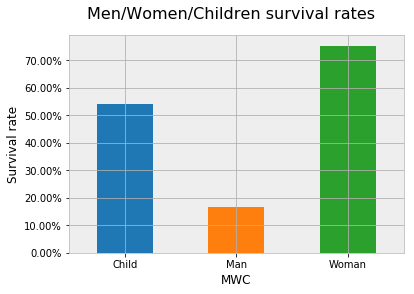

In [9]:
df_q1_mwc = df.groupby(['MWC', 'Survived']).size() / df.groupby('MWC').size()

# Função auxiliar para formatar eixo y em porcentagem
def percentage(x, pos):
    'The two args are the value and tick position'
    return '%1.2f%%' % (x * 100)

# Gráficos de barras com taxas de sobrevivência para primeira, segunda e terceira classes
from matplotlib.ticker import FuncFormatter
formatter = FuncFormatter(percentage) # Reaproveitando a função percentage já definida

fig, ax = plt.subplots();

fig.suptitle('Men/Women/Children survival rates', fontsize=16)

ax.yaxis.set_major_formatter(formatter);

axes = df_q1_mwc.unstack()[1].plot(kind='bar')

axes.set_ylabel('Survival rate');

plt.xticks(rotation=0);

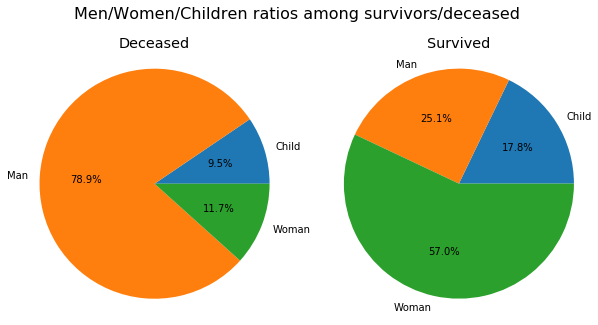

In [10]:
# Gráficos de pizza para proporção de homens, mulheres e crianças entre os sobreviventes/falecidos 
df_q1_mwc_pizza = df.groupby(['MWC', 'Survived']).size().unstack(fill_value=0);

ax = df_q1_mwc_pizza.plot.pie(subplots=True, figsize=(10,5), autopct='%1.1f%%');

plt.suptitle('Men/Women/Children ratios among survivors/deceased', fontsize=16);

ax[0].set_title('Deceased')
ax[0].axis('equal');
ax[0].get_legend().remove()
ax[0].set_ylabel('')

ax[1].set_title('Survived')
ax[1].axis('equal');
ax[1].get_legend().remove()
ax[1].set_ylabel('')

plt.subplots_adjust(top=0.85)
plt.show();

### Pergunta 2: A classe da passagem do passageiro teve influência na sua sobrevivência?

**Resposta:** Sim. Passageiros de classe mais alta tiveram uma taxa de sobrevivência maior.

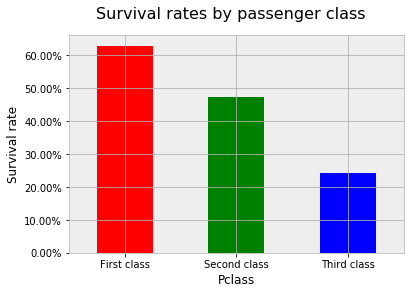

In [11]:
df_q2_pclass = df.groupby(['Pclass', 'Survived']).size() / df.groupby('Pclass').size()

# Gráficos de barras com taxas de sobrevivência para primeira, segunda e terceira classes
labels = 'First class', 'Second class', 'Third class'

from matplotlib.ticker import FuncFormatter
formatter = FuncFormatter(percentage) # Reaproveitando a função percentage já definida

fig, ax = plt.subplots();

fig.suptitle('Survival rates by passenger class', fontsize=16);

ax.yaxis.set_major_formatter(formatter);

axes = df_q2_pclass.unstack()[1].plot(kind='bar', color=['r','g','b'])

axes.set_ylabel('Survival rate');
axes.set_xticklabels(labels);

plt.xticks(rotation=0);

### Pergunta 3: Qual foi a distribuição de idades dos sobreviventes e não-sobreviventes?

**Resposta:** A distribuição de idade entre os 290 sobreviventes não foi significativamente diferente da distribuição de idade entre os 424 não-sobreviventes, exceto por uma contagem maior de crianças entre 0 e 10 anos.

Survivors df.describe()
count    290.000000
mean      28.324138
std       14.983905
min        0.000000
25%       19.000000
50%       28.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64 

Deceased df.describe()
count    424.000000
mean      30.606132
std       14.165621
min        1.000000
25%       21.000000
50%       28.000000
75%       39.000000
max       74.000000
Name: Age, dtype: float64 



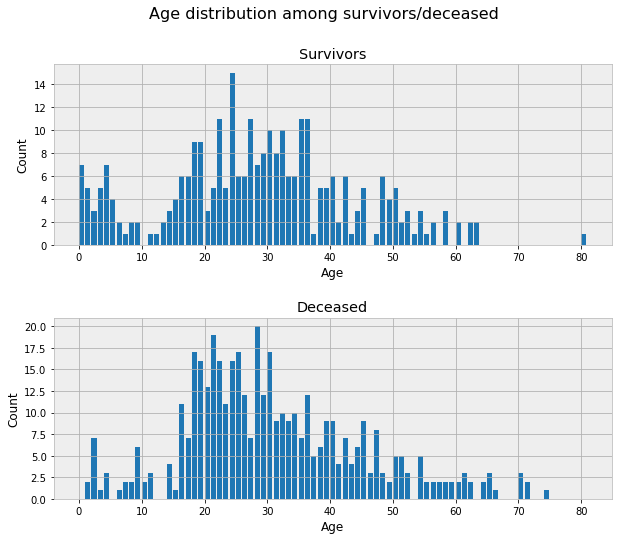

In [12]:
# Truncamento de idade devido à presença
df_q3_rounded_age = df[['Age', 'Survived']].copy()
df_q3_rounded_age.Age = np.floor(df_q3_rounded_age.Age)

df_q3_survived_age = df_q3_rounded_age[df_q3_rounded_age['Survived']==1]
df_q3_deceased_age = df_q3_rounded_age[df_q3_rounded_age['Survived']==0]

# Descrição distribuição de idades com df.describe()
print('Survivors df.describe()')
print(df_q3_survived_age.Age.describe(),'\n');

print('Deceased df.describe()')
print(df_q3_deceased_age.Age.describe(),'\n');

df_q3_groupby_age = df_q3_rounded_age.groupby(['Age', 'Survived'])['Survived']
df_q3_groupby_age_counts = df_q3_groupby_age.count().unstack(1).fillna(0);

# Histogramas com a distribuição de idade dos sobreviventes/falecidos 
ages = df_q3_groupby_age_counts.index.values

#print(ages)

survived = df_q3_groupby_age_counts[1]
deceased = df_q3_groupby_age_counts[0]

fig, ax = plt.subplots(2,1,figsize=(10, 8));

fig.suptitle('Age distribution among survivors/deceased', fontsize=16);

ax[0].set_title('Survivors');
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Count')
ax[0].bar(x=ages,height=survived,align='edge');

ax[1].set_title('Deceased');
ax[1].set_xlabel('Age')
ax[1].set_ylabel('Count')
ax[1].bar(x=ages,height=deceased,align='edge');

plt.subplots_adjust(hspace=0.4)
plt.show();



### Pergunta 4: Qual era o tamanho médio das famílias a bordo?

**Resposta:** O tamanho médio das famílias a bordo era de 1.33 pessoas por família - considerando apenas o sobrenome como indicador de parentesco. Isso se dá principalmente pela grande quantidade de pessoas viajando sozinhas (534).

Havia ainda um número considerável de famílias com duas pessoas (83) e um número razoável de famílias de três (28) ou quatro (14) integrantes. A maior família tinha nove integrantes, mas não havia famílias de oito integrantes. 

Uma análise em cima da variável **SibSp** poderia revelar se as famílias de duas pessoas eram principalmente casais ou não.

Tamanho médio das famílias a bordo: 1.3358320839580209


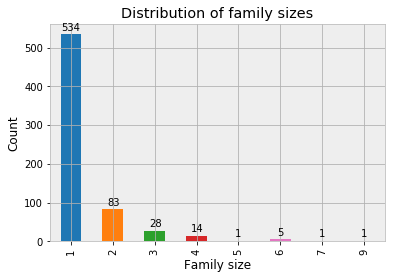

In [13]:
# Contagem de pessoas com mesmo sobrenome
df_q4 = df['Last Name'].value_counts()

# Contagem de famílias de mesmo tamanho
df_q4_counts = df_q4.value_counts().sort_index()

# Cálculo do tamanho médio das famílias a bordo
print('Tamanho médio das famílias a bordo:', df_q4.mean())

# Histograma da distribuição de tamanhos de família a bordo
ax = df_q4_counts.plot(kind='bar', 
                  title='Distribution of family sizes');
ax.set_xlabel('Family size');
ax.set_ylabel('Count');

for p in ax.patches:
    h = p.get_height()
    
    if h < 10:
        dx = 0.175
    elif h < 100:
        dx = 0.125
    else:
        dx = 0.025
    
    ax.annotate(str(p.get_height()), (dx+p.get_x(), p.get_height()+10))

plt.show();

# Exibição dos dataframes da questão para depuração
#print(df_q4_counts);
#print(df_q4)


### Pergunta 5: Qual porto foi responsável pelo maior número de passageiros?

**Resposta:** Southampton foi o porto com maior número de passageiros, sendo responsável por 72,3% das pessoas a bordo.

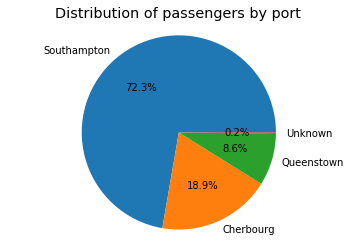

In [14]:
# Contagem de passageiros por porto

df_q5 = df['Embarked'].value_counts();

ax = df_q5.plot.pie(autopct='%1.1f%%');

ax.set_title('Distribution of passengers by port');
ax.set_ylabel('');

ax.axis('equal');

plt.show();

### Pergunta 6: Qual porto foi responsável pela maior receita?

**Resposta:** O porto de Southampton foi responsável pela maior receita (\$17439.40), o que era de se esperar pelo volume de passageiros embarcados. Quando falamos de receita per capita, entretanto, Cherbourg apresentou um ticket médio com o dobro do valor - \$59.95 versus \$27.08.


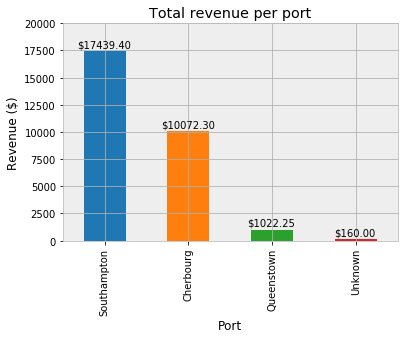

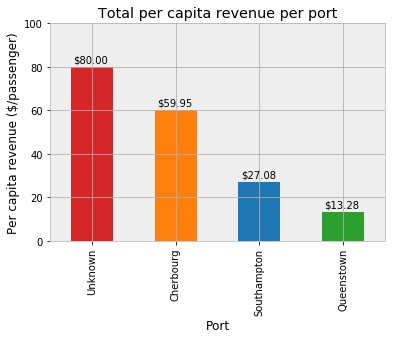

In [15]:
df_q6 = df.groupby(['Embarked'])['Fare'].sum().sort_values(ascending=False)

df_q6_per_passenger = df_q6.divide(df_q5).sort_values(ascending=False)

#print('Receita total por porto')
#print(df_q6,'\n')

#print('Total de passageiros por porto')
#print(df_q5,'\n')

#print('Receita per capita por porto')
#print(df_q6_per_passenger)

ax = df_q6.plot(kind='bar', 
                title='Total revenue per port');
ax.set_ylim(top=20000)
ax.set_xlabel('Port');
ax.set_ylabel('Revenue ($)');

for p in ax.patches:
    h = p.get_height()
    
    if h < 1000:
        dx = -0.01
    elif h < 10000:
        dx = -0.05
    else:
        dx = -0.08
    
    ax.annotate("${:.2f}".format(round(p.get_height(),2)), (dx+p.get_x(), p.get_height()+350))

plt.show();

ax = df_q6_per_passenger.plot(kind='bar', 
                title='Total per capita revenue per port');
ax.set_ylim(top=100)
ax.set_xlabel('Port');
ax.set_ylabel('Per capita revenue ($/passenger)');

for p in ax.patches:
    h = p.get_height()
    
    x = p.get_x()+1.25
    s_color = (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0)
    c_color = (1.0, 0.4980392156862745, 0.054901960784313725, 1.0)
    q_color = (0.17254901960784313, 0.6274509803921569, 0.17254901960784313, 1.0)
    u_color = (0.8392156862745098, 0.15294117647058825, 0.1568627450980392, 1.0)
    
    if(x == 1):
        p.set_facecolor(u_color)
    elif(x == 2):
        p.set_facecolor(c_color)
    elif(x == 3):
        p.set_facecolor(s_color)
    elif(x == 4):
        p.set_facecolor(q_color)
    
    dx = 0.03
    
    ax.annotate("${:.2f}".format(round(p.get_height(),2)), (dx+p.get_x(), p.get_height()+2))

plt.show();

## Conclusões

**1. Mulheres e crianças tiveram uma taxa maior de sobrevivência?**

Sim. Sua taxa de sobrevivência foi de 3 a 5 vezes maior que a taxa de sobrevivência de homens. Além disso, homens são minoria entre os sobreviventes e maioria entre os falecidos.

**2. A classe da passagem do passageiro teve influência na sua sobrevivência?**

Sim. Passageiros de classe mais alta tiveram uma taxa de sobrevivência maior.

**3. Qual foi a distribuição de idades dos sobreviventes e não-sobreviventes?**

A distribuição de idade entre os 290 sobreviventes não foi significativamente diferente da distribuição de idade entre os 424 não-sobreviventes, exceto por uma contagem maior de crianças entre 0 e 10 anos.

**4. Qual era o tamanho médio das famílias a bordo?**

O tamanho médio das famílias a bordo era de 1.33 pessoas por família - considerando apenas o sobrenome como indicador de parentesco. Isso se dá principalmente pela grande quantidade de pessoas viajando sozinhas (534).

**5. Qual porto foi responsável pelo maior número de passageiros?**

Southampton foi o porto com maior número de passageiros, sendo responsável por 72,3% das pessoas a bordo.

**6. Qual porto foi responsável pela maior receita?**

O porto de Southampton foi responsável pela maior receita (\$17439.40), o que era de se esperar pelo volume de passageiros embarcados. Quando falamos de receita per capita, entretanto, Cherbourg apresentou um ticket médio com o dobro do valor - \$59.95 versus \$27.08.

### Limitações da análise

Este trabalho tem como objetivo principal a investigação do conjunto de dados sob uma perspectiva exploratória. Não foi feita uma análise de causa/efeito ou significância de características para a sobrevivência ou não de passageiros. Por isso, não se deve interpretar as conclusões como definitivas - inclusive por termos um número grande de dados faltantes.

De qualquer forma, mesmo com uma análise tão simples, conseguimos obter maiores insights sobre essa tragédia. Estes insights fornecem uma base para investigações mais complexas sobre o assunto, que poderiam evitar novos acidentes dessa magnitude.

## Referências

Uma lista de sites, livros, fóruns, postagens de blogs, repositórios do GitHub, etc. que você usou ou em que se baseou para criar o projeto (coloque N/A caso não tenha usado nenhum desses recursos).

1. https://www.dummies.com/education/history/suites-and-cabins-for-passengers-on-the-titanic/
2. https://www.encyclopedia-titanica.org/cabins.html
3. https://www.kaggle.com/c/titanic/discussion/4693
4. https://medium.com/@naomi.fridman/pandas-groupby-explained-with-titanic-6a1c47eb8182
5. https://medium.com/dunder-data/selecting-subsets-of-data-in-pandas-6fcd0170be9c
6. https://cmdlinetips.com/2018/02/how-to-subset-pandas-dataframe-based-on-values-of-a-column/